# Testing reasonability of uncertainties in spectral parameters

In [21]:
import numpy as np
import random
import time

In [22]:
import matplotlib
import matplotlib.pyplot as plt

In [23]:
import IPython

In [24]:
%matplotlib inline

In [25]:
print(np.__version__) #Should be 1.20.3

1.20.3


In [26]:
import sys
import os

In [27]:
files_name = "spectral_params_and_B_config" + "_files"
parent_dir = (os.getcwd()+"/").split('/notebooks/', 1)[0]
files_dir = os.getcwd() + "/" + files_name 
sys.path.append(parent_dir+"/analysis_scripts/ALP_sim")

In [28]:
from ALP_quick_sim import ALP_sim

In [29]:
A = ALP_sim(set_null=0,set_obs=0)

In [30]:
def full_params(
                params: list[float]
                ) -> list[float]:
        
        ''' 
        The default parameter expansion function. The expansion function allows to flexibly choose 
        which model parameters are considered as input to the model method (e.g. self.model,
        self.model_log, etc. Toy models are not affected). For example, when this present default 
        function is used, the only inputs to the model methods are the values of mass and coupling, 
        i.e. a 2D list. If you wanted to make, for example, the rms of the B-field the third input 
        parameter, first copy self.full_params_default to a new function new_func(params), change 
        the value corresponding to the B-field RMS value to "params[2]", and then set 
        self.full_param_vec (see init method) to new_func. See also method full_params_spectral for
        a different example. The model methods will then expect a 3D list instead. When running the 
        model method, self.full_param_vec(params) is called, effectively expanding the model 
        parameters to the full list of 18.  
        
        
        Input:
            -  params:              Input parameters to model methods. 

        Output:
            -  full_par             Full list of all 18 model parameter values. 


        '''
        
        full_par = [
                    0,          # mass m in neV
                    0,          # coupling constant g in 10^(-11) /GeV
                    
                    params[0],          # Amplitude of power law, in "TeV-1 cm-2 s-1" # 10e-6 
                    2.11,               # Spectral index of the PWL
                    300,                # Reference energy (?) E0, In GeV
                    560,                #Cut-off energy Ecut, in GeV
                    
                    
                    25.,                # rms of B field, default = 10.
                    39.,                # normalization of electron density, default = 39.
                    4.05,               # second normalization of electron density, see Churazov et al. 2003, Eq. 4, default = 4.05
                    500.,               # extension of the cluster, default = 500.
                    80.,                # electron density parameter, see Churazov et al. 2003, Eq. 4, default = 80.
                    280.,               # electron density parameter, see Churazov et al. 2003, Eq. 4, default = 200.
                    1.2,                # electron density parameter, see Churazov et al. 2003, Eq. 4, default = 1.2
                    0.58,               # electron density parameter, see Churazov et al. 2003, Eq. 4, default = 0.58
                    0.5,                # scaling of B-field with electron denstiy, default = 0.5
                    0.18,               # maximum turbulence scale in kpc^-1, taken from A2199 cool-core cluster, see Vacca et al. 2012, default = 0.18
                    9.,                 # minimum turbulence scale, taken from A2199 cool-core cluster, see Vacca et al. 2012, default = 9.
                    -2.80               # turbulence spectral index, taken from A2199 cool-core cluster, see Vacca et al. 2012, default = -2.80
                    ]
    
        return full_par

A.full_param_vec = full_params

In [31]:
A.configure_model(residuals=True, logcounts=True, log_params=[0], param_names = ['A'], param_units = [''], params = [0])

/home/gert/ALPs_with_SWYFT/analysis_scripts/ALP_sim/ALP_quick_sim.py:426: UserWarning: The number of model parameters is not equal to the number of null-hypothesis parameters
  warnings.warn("The number of model parameters is not equal to the number of null-hypothesis parameters")


In [32]:
# A.configure_plot(xmin=2e1, xmax=6e3, ymin=-0.15, ymax=0.1, legend=1)#, figsize=(12,5))
# legend=False

In [33]:
A.configure_obs(nbins = 50, nbins_etrue = 150,livetime = 300,emin=1e1, emax=1.5e4,
                irf_file = parent_dir+"/IRFs/CTA/Prod5-North-20deg-AverageAz-4LSTs09MSTs.180000s-v0.1.fits")

In [38]:
guess = 1.54e-9
nps = [1.51e-9, 1.57e-9]

In [39]:
colors = ['r','#FF9900','g','b','m']
linestyles = ['-','-','-','-','-']

 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


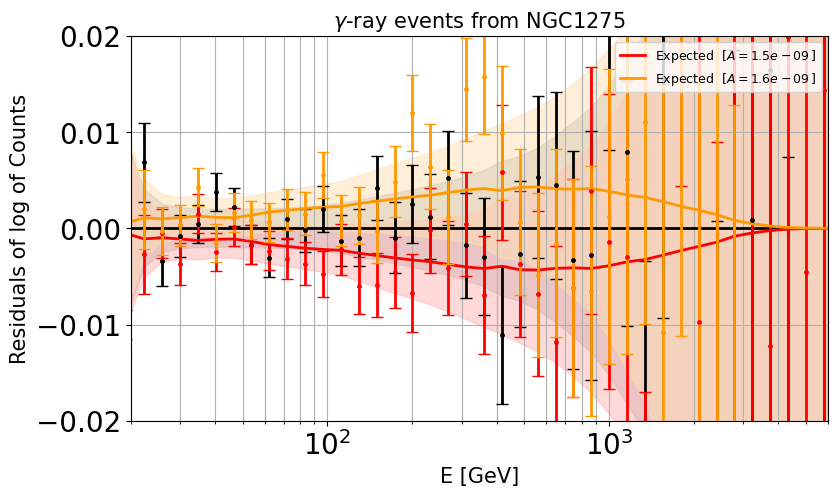

In [43]:
A.configure_obs(livetime = 10)
A.configure_plot(xmin = 2e1, xmax = 6e3, ymin=-0.02, ymax=0.02, legend = 1)
A.configure_model(null_params = [guess])
A.compute_case(new_fig=1,null=1,plot_obs=1,color="k",linestyle="-", label_exp=0, label_obs=0)   
for i, nuisance in enumerate(nps):
    A.configure_model(params=[nuisance])
    A.compute_case(new_fig=0,plot_obs=1,color=colors[i],color_obs=colors[i],linestyle=linestyles[i],label_exp=1,label_obs=0, errorbands=True)

 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


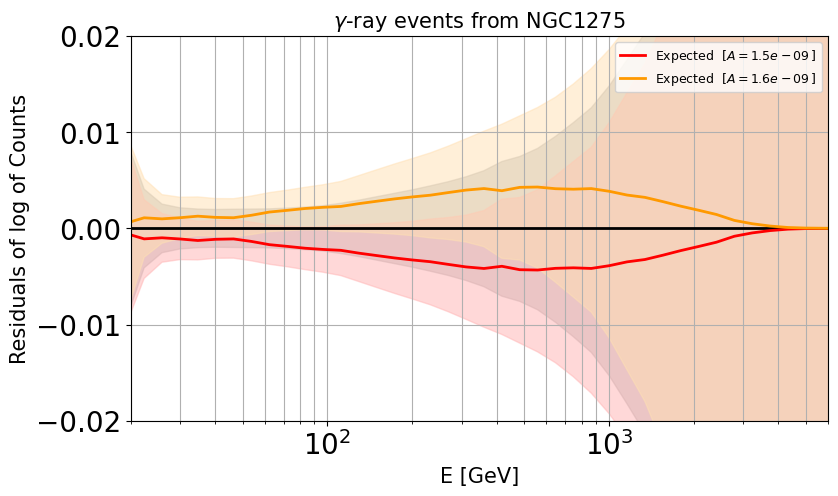

In [42]:
A.configure_obs(livetime = 10)
A.configure_plot(xmin = 2e1, xmax = 6e3, ymin=-0.02, ymax=0.02, legend = 1)
A.configure_model(null_params = [guess])
A.compute_case(new_fig=1,null=1,plot_obs=0,color="k",linestyle="-", label_exp=0)   
for i, nuisance in enumerate(nps):
    A.configure_model(params=[nuisance])
    A.compute_case(new_fig=0,plot_obs=0,color=colors[i],linestyle=linestyles[i],label_exp=1, errorbands=True)